# Step - 1: 
    Download the csv file and read it in a Pandas Dataframe. Handle missing values and treat outliers. Don’t forget to visualise the data.


In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data (1).csv')
data.head(5)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
data.shape

(2227, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# Dealing with missing values

In [5]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
data['x1'].value_counts()

-118.366669    8
 31.633331     6
 30.633331     5
 78.633331     5
-86.366669     5
              ..
 58.434396     1
 18.408090     1
-99.593049     1
-72.501026     1
 54.003740     1
Name: x1, Length: 1887, dtype: int64

In [7]:
data['x2'].value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-119.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

In [8]:
#for colname in data:
 #   data[colname].fillna(data[colname].median()[0], inplace = True)
    
data['x1'].fillna(data['x1'].median(), inplace = True)
data['x2'].fillna(data['x2'].median(), inplace = True)

#just filling the missing value with mode in every column

In [9]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# dealing with outliers

In [10]:
import warnings
warnings.filterwarnings('ignore')

# to ignore warnings

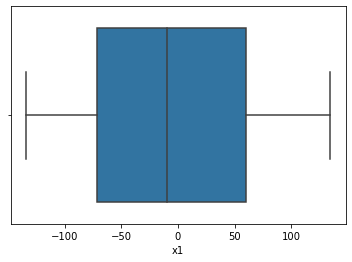

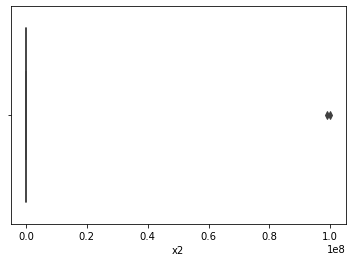

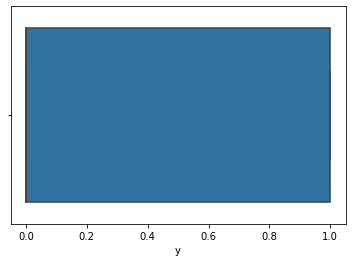

In [11]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

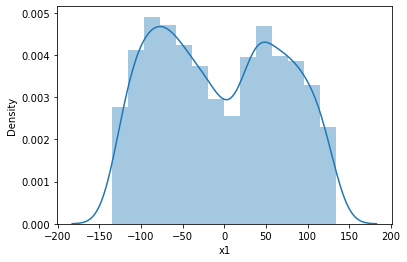

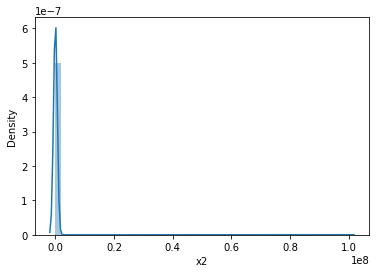

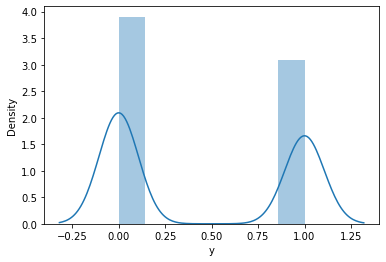

In [12]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

# treating outliers

IQR: 143.72673665000002
Q1, Q2, Q3: -79.976865695 63.749870955000006
lw, up: -295.56697067000005 279.33997593000004


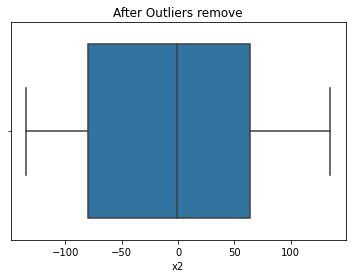

(2225, 3)

In [13]:
# 'x2' we have only one side outliers so we can use only [> upper range]

# Outliers handling
Q1 = data['x2'].quantile(0.25)
Q2 = data['x2'].quantile(0.5)
Q3 = data['x2'].quantile(0.75)

IQR = Q3-Q1

print('IQR:' , IQR)

print('Q1, Q2, Q3:',Q1, Q3)

# Max and Lower range

lw = Q1-1.5*IQR
up = Q3+1.5*IQR

print('lw, up:' , lw, up)

data.drop(data[data.x2 > up].index , inplace=True)

# After remove  Outliers
sns.boxplot(data.x2)
plt.title('After Outliers remove')

plt.show()

data.shape

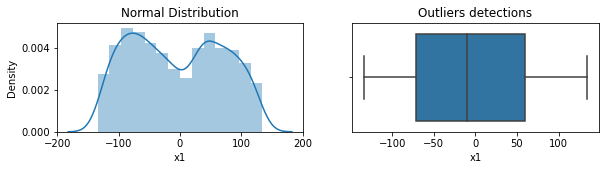

(2225, 3)

In [14]:
# x1 = 0 no outliers

# Multiverient Analysis :

plt.figure(figsize=(15,2))

plt.subplot(131)
sns.distplot(data.x1)
plt.title('Normal Distribution')

plt.subplot(132)
sns.boxplot(data.x1)
plt.title('Outliers detections')


plt.show()
data.shape

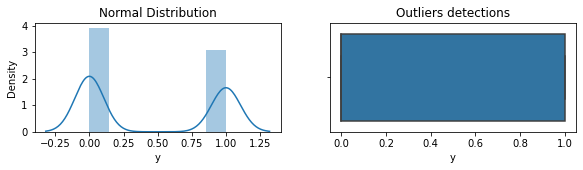

(2225, 3)

In [15]:
# y = 0 no outliers

# Multiverient Analysis :

plt.figure(figsize=(15,2))

plt.subplot(131)
sns.distplot(data.y)
plt.title('Normal Distribution')

plt.subplot(132)
sns.boxplot(data.y)
plt.title('Outliers detections')

plt.show()
data.shape

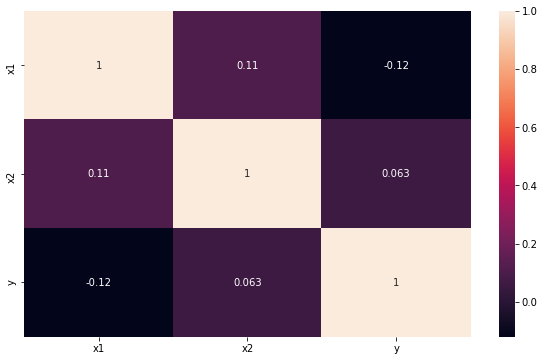

In [16]:
# correlation Metrics
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

## checking y column - balancing / imbalancing

In [17]:
data['y'].value_counts()

0    1240
1     985
Name: y, dtype: int64

0    1240
1     985
Name: y, dtype: int64


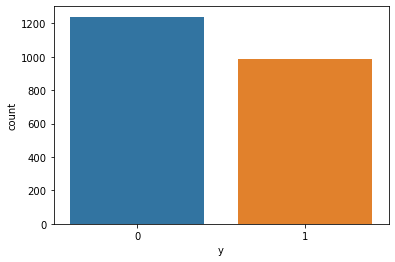

In [18]:
sns.countplot(x = 'y' , data = data)

print(data['y'].value_counts())

In [19]:
print(100*(1240/float(data.shape[0])))

print('')

print(100*(985/float(data.shape[0])))

55.73033707865168

44.26966292134831


#  Step - 2: Train different Machine Learning models:
        Logistic Regression
        SVM with Linear Kernel
        SVM with RBF Kernel
        Decision Tree
        KNN


# splitting the dataset

In [20]:
# independent & dependent feature

X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]  

# Splitting data into Training and Test splits¶

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.20, random_state = 11)

#80% and 20%

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (1780, 2)
X_test: (445, 2)
y_train: (1780,)
y_test: (445,)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


# model 1 - logistic

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

log_reg.fit(X_train, y_train)
y_pred_log_test = log_reg.predict(X_test)

print('Model:', log_reg)
print('')

print('for test:')
print(classification_report (y_test, y_pred_log_test))


print('')
print('for train :')
y_pred_log_train = log_reg.predict(X_train)

print('')

print(classification_report (y_train, y_pred_log_train))

#f1_score(y_test, y_pred_log_test)

Model: LogisticRegression()

for test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       310
           1       0.99      0.39      0.56       247

    accuracy                           0.73       557
   macro avg       0.83      0.69      0.68       557
weighted avg       0.81      0.73      0.69       557


for train :

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       930
           1       1.00      0.45      0.62       738

    accuracy                           0.76      1668
   macro avg       0.85      0.72      0.72      1668
weighted avg       0.83      0.76      0.73      1668



# model 2 - SVM with Linear Kernel

In [23]:
from sklearn import svm

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)


linear_svc = svm.SVC(kernel='linear').fit(X_train, y_train)

kernels = ['SVC with Linear Kernel']

y_pred= linear_svc.predict(X_test) 


print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       310
           1       1.00      0.36      0.53       247

    accuracy                           0.71       557
   macro avg       0.83      0.68      0.66       557
weighted avg       0.81      0.71      0.68       557



# model 3 - SVM with RBF Kernel

In [24]:
from sklearn import svm

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train, y_train)

kernels = ['SVC with RBF Kernel']

y_pred= rbf_svc.predict(X_test) 

#accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       496
           1       0.23      0.93      0.37        61

    accuracy                           0.65       557
   macro avg       0.61      0.78      0.56       557
weighted avg       0.90      0.65      0.72       557



# MODEL 4 - Decision Tree

In [25]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()


decision_tree.fit(X_train,y_train)

y_pred_for_DT = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

print(decision_tree)

print('')

print('for test:', )

print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred_for_DT,y_test))

confusion_matrix(y_pred_for_DT,y_test)



DecisionTreeClassifier()

for test:
DecisionTreeClassifier Model Accuracy :  0.9353680430879713


array([[290,  16],
       [ 20, 231]])

In [26]:
from sklearn.metrics import recall_score
print('recall_score_for_DT : ',recall_score(y_test, y_pred_for_DT))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_DT : ',precision_score(y_test, y_pred_for_DT))

print('')

print(classification_report(y_pred_for_DT,y_test))


recall_score_for_DT :  0.9352226720647774

precision_score_for_DT :  0.9203187250996016

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       306
           1       0.94      0.92      0.93       251

    accuracy                           0.94       557
   macro avg       0.94      0.93      0.93       557
weighted avg       0.94      0.94      0.94       557



# MODEL 5 - KNN

In [27]:
#KNN also a used for Regression Technique. i hope it will help to find Prediction with best accuracy

#Import Libaries

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

knn.fit(X_train,y_train)

y_pred_for_knn = knn.predict(X_test)


print('Model:', knn)

print('')
print('for test:')
      
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred_for_knn,y_test))

print('')

confusion_matrix(y_pred_for_knn,y_test)

Model: KNeighborsClassifier()

for test:
KNeighborsClassifier Model Accuracy :  0.9587073608617595



array([[300,  13],
       [ 10, 234]])

In [28]:
from sklearn.metrics import recall_score

print(classification_report(y_pred_for_knn,y_test))

print('')
print('recall_score_for_knn : ',recall_score(y_test, y_pred_for_knn))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_knn : ',precision_score(y_test, y_pred_for_knn))

print('')



              precision    recall  f1-score   support

           0       0.97      0.96      0.96       313
           1       0.95      0.96      0.95       244

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557


recall_score_for_knn :  0.9473684210526315

precision_score_for_knn :  0.9590163934426229



# observations - 

    model accuracy -
        Logistic Regression - 0.73
        SVM with Linear Kernel - 0.71
        SVM with RBF Kernel - 0.65
        Decision Tree - 0.93
        KNN - 0.95

# Step - 3: Perform proper hyperparameter tuning for each model from Step - 2 😢


In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

log_reg.fit(X_train, y_train)
y_pred_log_test = log_reg.predict(X_test)

print('Model:', log_reg)
print('')

print('for test:')
print(classification_report (y_test, y_pred_log_test))

Model: LogisticRegression()

for test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       310
           1       0.99      0.39      0.56       247

    accuracy                           0.73       557
   macro avg       0.83      0.69      0.68       557
weighted avg       0.81      0.73      0.69       557



# Hyper-Parameter tuning for Logistic

    Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver). Regularization (penalty) can sometimes be helpful.
    
    solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
    penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
    C in [100, 10, 1.0, 0.1, 0.01]

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters

solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid_search_for_log = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_search_for_log, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_search.fit(X_train,y_train)



GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [31]:
grid_search.best_score_

0.758389245605175

In [32]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

# model building

In [33]:
log_reg2 = grid_search.best_estimator_

log_reg2.fit(X_train,y_train)

y_pred_for_log_reg2 = log_reg2.predict(X_test)



In [34]:
#print('Training set accuracy: ', metrics.accuracy_score(y_train_smote, y_hat_knn2))
print('Test set accuracy : ', accuracy_score(y_pred_for_log_reg2, y_test))

print('')

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_for_log_reg2))

print('')
from sklearn.metrics import recall_score
print('recall_score_for_log_reg2 : ',recall_score(y_test, y_pred_for_log_reg2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_log_reg2 : ',precision_score(y_test, y_pred_for_log_reg2))



Test set accuracy :  0.7360861759425493

[[307   3]
 [144 103]]

recall_score_for_log_reg2 :  0.41700404858299595

precision_score_for_log_reg2 :  0.9716981132075472


# observations

-->

    Before applying hyper-parameter
        
            acc = 0.73
            precision = 0.99 
            recall = 0.38
->
    
    AFTER applying hyper parametrs to the base model the output is 
        
        acc = 0.73
        precision = 0.97
        recall = 0.41

# svm - model 2

In [35]:
from sklearn import svm

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)


linear_svc = svm.SVC(kernel='linear').fit(X_train, y_train)

kernels = ['SVC with Linear Kernel']

y_pred= linear_svc.predict(X_test) 

print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       310
           1       1.00      0.36      0.53       247

    accuracy                           0.71       557
   macro avg       0.83      0.68      0.66       557
weighted avg       0.81      0.71      0.68       557



# hyper - parameter tuning for svm linear

In [36]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.731 total time=   3.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.769 total time=   3.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   3.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.724 total time=   2.7s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.742 total time=   3.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   3.6s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.769 total time=   3.2s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   3.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.724 total time=   2.7s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.742 total time=   3.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.731 total time=   3.6s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [37]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [38]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       310
           1       1.00      0.36      0.53       247

    accuracy                           0.71       557
   macro avg       0.83      0.68      0.66       557
weighted avg       0.81      0.71      0.68       557



# observations 


-->

    Before applying hyper-parameter

        acc = 0.71
        precision = 1.0
        recall = 0.35
->

    AFTER applying hyper parametrs to the base model the output is 

        acc = 0.73
        precision = 1.00
        recall = 0.36

# svm - rbf - model 3

In [41]:
from sklearn import svm

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train, y_train)

kernels = ['SVC with RBF Kernel']

y_pred= rbf_svc.predict(X_test) 

#accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       496
           1       0.23      0.93      0.37        61

    accuracy                           0.65       557
   macro avg       0.61      0.78      0.56       557
weighted avg       0.90      0.65      0.72       557



# hyper - parameter tuning for svm rbf

In [42]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.557 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.557 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.557 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.934 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.001)


In [44]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       310
           1       0.96      0.96      0.96       247

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



# model - 4 knn

In [45]:
#KNN also a used for Regression Technique. i hope it will help to find Prediction with best accuracy

#Import Libaries

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()

# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

knn.fit(X_train,y_train)

y_pred_for_knn = knn.predict(X_test)


print('Model:', knn)

print('')
print('for test:')
      
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred_for_knn,y_test))

print('')
print('recall_score_for_knn : ',recall_score(y_test, y_pred_for_knn))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_knn : ',precision_score(y_test, y_pred_for_knn))

Model: KNeighborsClassifier()

for test:
KNeighborsClassifier Model Accuracy :  0.9587073608617595

recall_score_for_knn :  0.9473684210526315

precision_score_for_knn :  0.9590163934426229


# Hyper-Parameter tuning for knn

    n_neighbors: Decide the best k based on the values we have computed earlier.

    weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.

    metric: The distance metric to be used will calculating the similarity.

In [46]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
              }

grid_search_for_knn = GridSearchCV(KNeighborsClassifier(), grid_params , cv=3)

# fit the model on our train set
#grid_result
grid_search_for_knn.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [47]:
# find the best score
print('best score: ',grid_search_for_knn.best_score_)

print('')

# get the hyperparameters with the best score
print('best parameters for knn : ',grid_search_for_knn.best_params_)

best score:  0.947242206235012

best parameters for knn :  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


# model evaluation

In [48]:
# use the best hyperparameters

knn2 = KNeighborsClassifier(n_neighbors = 5, weights = 'distance' ,metric = 'manhattan')

#knn2 = grid_search_for_knn.best_params_

knn2.fit(X_train,y_train)

# get a prediction
y_hat_knn2 = knn2.predict(X_train)

y_pred_for_knn2 = knn2.predict(X_test)

In [49]:
#print('Training set accuracy: ', metrics.accuracy_score(y_train_smote, y_hat_knn2))
print('Test set accuracy : ', accuracy_score(y_pred_for_knn2, y_test))

print('')

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_for_knn2))

print('')
from sklearn.metrics import recall_score
print('recall_score_for_knn2 : ',recall_score(y_test, y_pred_for_knn2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_knn2 : ',precision_score(y_test, y_pred_for_knn2))



Test set accuracy :  0.9533213644524237

[[298  12]
 [ 14 233]]

recall_score_for_knn2 :  0.9433198380566802

precision_score_for_knn2 :  0.9510204081632653


# observations

# --

    Before applying hyper - parameters

        KNeighborsClassifier Model Accuracy :  0.95

        recall_score_for_knn :  0.94

        precision_score_for_knn :  0.95

    After applying hyper- parametr

        Test set accuracy :  0.95

        recall_score_for_knn2 :  0.94

        precision_score_for_knn2 :  0.95

# model - 5 - dt

In [50]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()


decision_tree.fit(X_train,y_train)

y_pred_for_DT = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

print(decision_tree)

print('')

print('for test:', )

print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred_for_DT,y_test))

print('')

from sklearn.metrics import recall_score
print('recall_score_for_DT : ',recall_score(y_test, y_pred_for_DT))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_DT : ',precision_score(y_test, y_pred_for_DT))

DecisionTreeClassifier()

for test:
DecisionTreeClassifier Model Accuracy :  0.9371633752244165

recall_score_for_DT :  0.9352226720647774

precision_score_for_DT :  0.924


# hyper parameter tuning for DT

    max_depth
    min_samples_leaf
    criterion : ["gini", "entropy"]
    min_impurity_split

In [51]:
###
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [2,3,5,10,20],
              "min_samples_leaf": [1, 2 ,5 ,9],
              "criterion": ["gini", "entropy"]
             }
  
# Instantiating Decision Tree classifier
decision_tree = DecisionTreeClassifier()
print(decision_tree)

print('')

  
grid_Search = GridSearchCV(decision_tree, param_dist, cv = 3)

grid_model = grid_Search.fit(X_train,y_train)

grid_model.best_estimator_

DecisionTreeClassifier()



DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [52]:
# find the best score
print('best score: ',grid_model.best_score_)

print('')

# get the hyperparameters with the best params/estimator same
print('best parameters for DT : ',grid_model.best_params_)

best score:  0.9418465227817746

best parameters for DT :  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}


In [53]:

# With the Best HyperTunning Parameter
dt2 = grid_model.best_estimator_

#dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
dt2.fit(X_train,y_train)

y_pred_FOR_DT2 = dt2.predict(X_test)

print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred_FOR_DT2,y_test))

print('')

from sklearn.metrics import recall_score
print('recall_score_for_DT2 : ',recall_score(y_test, y_pred_FOR_DT2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_DT2 : ',precision_score(y_test, y_pred_FOR_DT2))



DecisionTreeClassifier Model Accuracy :  0.9371633752244165

recall_score_for_DT2 :  0.9392712550607287

precision_score_for_DT2 :  0.9206349206349206


# observations

# --

    Before applying hyper - parameters
    
        DecisionTreeClassifier Model Accuracy :  0.94

        recall_score_for_DT :  0.94

        precision_score_for_DT :  0.92

    After applying hyper- parametr
    
        DecisionTreeClassifier Model Accuracy :  0.95

        recall_score_for_DT2 :  0.93

        precision_score_for_DT2 :  0.94
    
    

# Step - 4: Compare all the models and write your observations i.e. why is one model better than the other?
Add this observation at the end of your jupyter notebook
Hint: Try to visualise the data 😮

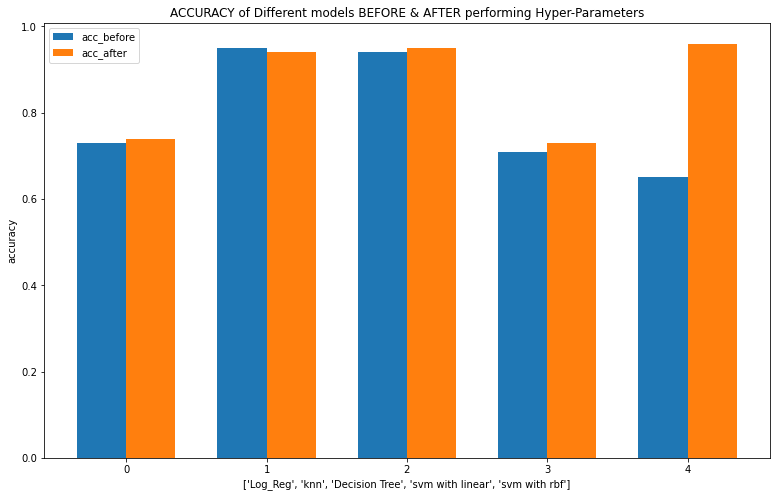

In [54]:
import matplotlib.pyplot as plt
import numpy as np


models = ["Log_Reg", "knn", "Decision Tree", "svm with linear", "svm with rbf"]

acc_before = np.array([0.73, 0.95, 0.94 , 0.71 , 0.65])
acc_after = np.array([0.74, 0.94, 0.95 , 0.73 , 0.96])


x = np.arange(len(models))  # the label locations

width = 0.35  # the width of the bars

#fig, ax = plt.subplots()

plt.figure(figsize=[13,8])


rects1 = plt.bar(x - width/2, acc_before, width, label='acc_before')
rects2 = plt.bar(x + width/2, acc_after, width, label='acc_after')

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.title('ACCURACY of Different models BEFORE & AFTER performing Hyper-Parameters')

plt.ylabel('accuracy')
plt.xlabel('Models')
#plt.xticks(x)
plt.xlabel(models)

plt.legend()

plt.show()

# Decision Tree IS BEST

# Step - 5: Upload your Jupyter Notebook on Github or Google Drive and submit the link in the form mentioned below. 
